# US Police Shootings

## Задание 

Проанализировать выбранную базу данных
- Ссылка на датасет: https://www.kaggle.com/datasets/ahsen1330/us-police-shootings

- Работу выполнила: Гусарова Александра
- Граппа: ММР 211

# Загрузка датасета и начальные настройки

In [2]:
#импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
import scipy.stats as stats
import scipy.stats

In [3]:
shootings= pd.read_excel('shootings.xlsx')

In [4]:
shootings.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,White,Guthrie,OK,False,attack,Not fleeing,False,Guns
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,Hispanic,Chandler,AZ,False,attack,Car,False,Guns
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,White,Assaria,KS,False,attack,Not fleeing,False,Guns
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,White,Burlington,IA,False,other,Not fleeing,True,Unarmed
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,Black,Knoxville,PA,False,attack,Not fleeing,False,Other unusual objects


In [5]:
#размер датасета
shootings.shape

(4895, 15)

In [6]:
#информация о датасете
shootings.info

<bound method DataFrame.info of         id                name        date   manner_of_death       armed  \
0        3          Tim Elliot  2015-01-02              shot         gun   
1        4    Lewis Lee Lembke  2015-01-02              shot         gun   
2        5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed   
3        8     Matthew Hoffman  2015-01-04              shot  toy weapon   
4        9   Michael Rodriguez  2015-01-04              shot    nail gun   
...    ...                 ...         ...               ...         ...   
4890  5916     Rayshard Brooks  2020-06-12              shot       Taser   
4891  5925      Caine Van Pelt  2020-06-12              shot         gun   
4892  5918        Hannah Fizer  2020-06-13              shot     unarmed   
4893  5921      William Slyter  2020-06-13              shot         gun   
4894  5924      Nicholas Hirsh  2020-06-15              shot         gun   

       age gender      race           city state  signs

In [7]:
shootings.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

In [8]:
#для удобства перемеинуем колонки. напишем названия на русском языке, размер популяции обозначим годами.
shootings.rename(columns = {'id': "Номер", 'name': "Имя",'date': "Дата", 'manner_of_death': "Способ задержания", 'armed': "Вооружение", 
                            'age': "Возраст", 'gender': "Пол", 'race': "Расса",
                            'city': "Город", 'state': "Штат", 'signs_of_mental_illness': "Ментальное здоровье", 
                            'threat_level': "Уровень угрозы", 'flee': "Отступление",
                            'body_camera': "Нательная камера", 'arms_category': "Категория оружия"}, inplace = True)
shootings

,Номер,Имя,Дата,Способ задержания,Вооружение,Возраст,Пол,Расса,Город,Штат,Ментальное здоровье,Уровень угрозы,Отступление,Нательная камера,Категория оружия
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [9]:
#проверим пропущенные значения в массиве данных
shootings.isnull().sum()

Номер                  0
Имя                    0
Дата                   0
Способ задержания      0
Вооружение             0
Возраст                0
Пол                    0
Расса                  0
Город                  0
Штат                   0
Ментальное здоровье    0
Уровень угрозы         0
Отступление            0
Нательная камера       0
Категория оружия       0
dtype: int64

In [10]:
#посмотрим описательную статистику массива данных
shootings.describe()

,Номер,Возраст
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [11]:
#проведем анализ столбца возраст
Возраст = shootings['Возраст'].value_counts().sort_values()

In [12]:
shootings.Возраст.unique()

array([53.       , 47.       , 23.       , 32.       , 39.       ,
       18.       , 22.       , 35.       , 34.       , 25.       ,
       31.       , 41.       , 30.       , 37.       , 28.       ,
       42.       , 36.       , 49.       , 71.       , 33.       ,
       29.       , 43.       , 24.       , 75.       , 68.       ,
       27.       , 48.       , 21.       , 67.       , 19.       ,
       54.       , 17.       , 56.       , 61.       , 45.       ,
       26.       , 40.       , 59.       , 38.       , 51.       ,
       74.       , 57.       , 46.       , 16.       , 50.       ,
       20.       , 77.       , 37.1179309, 58.       , 64.       ,
       52.       , 63.       , 44.       , 60.       , 66.       ,
       83.       , 72.       , 76.       , 62.       , 55.       ,
       69.       , 15.       , 65.       ,  6.       , 12.       ,
       70.       , 80.       , 14.       , 82.       , 13.       ,
       73.       , 91.       , 79.       , 78.       , 84.    

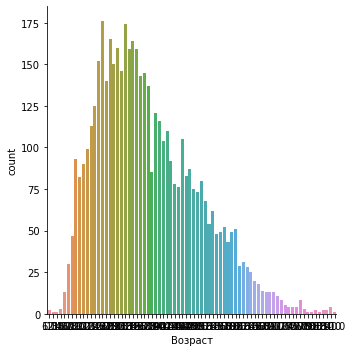

In [13]:
#построим категориальный график, используя визуализацию библиотеки plot
sns.catplot(x = 'Возраст', data = shootings, kind = 'count')

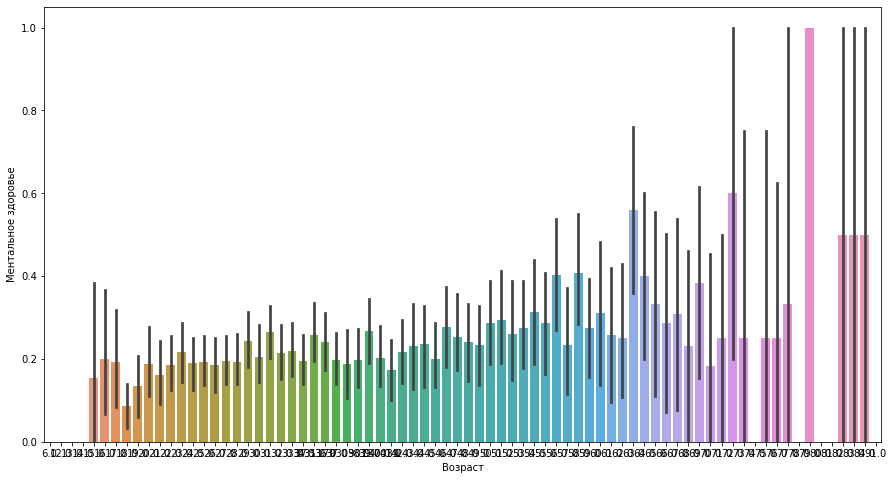

In [14]:
#Проверим взаимосвязи как влияют разные показатели на возраст стрелявших
plot = plt.figure(figsize=(15,8))
sns.barplot(x = 'Возраст', y = 'Ментальное здоровье', data = shootings)
plt.show()

In [15]:
#посмотрим, в каком штате полицейские чаще всего используют оружие
shootings ['Штат'].value_counts().head(10)

CA    701
TX    426
FL    324
AZ    222
CO    168
GA    161
OK    151
NC    148
OH    146
WA    126
Name: Штат, dtype: int64

In [16]:
# для визуализации создадим отдельную переменную
Штат = shootings ['Штат'].value_counts()
Штат.info

<bound method Series.info of CA    701
TX    426
FL    324
AZ    222
CO    168
GA    161
OK    151
NC    148
OH    146
WA    126
TN    125
MO    124
LA    102
IL     99
PA     95
AL     95
NM     93
VA     92
IN     91
NY     90
WI     88
KY     87
NV     85
SC     80
MD     77
OR     76
AR     73
MI     71
MS     61
NJ     60
MN     60
UT     58
KS     49
WV     46
ID     37
AK     36
MA     33
IA     31
MT     29
HI     29
NE     24
ME     21
CT     20
SD     14
DC     13
WY     13
NH     12
ND     11
DE     10
VT      8
RI      4
Name: Штат, dtype: int64>

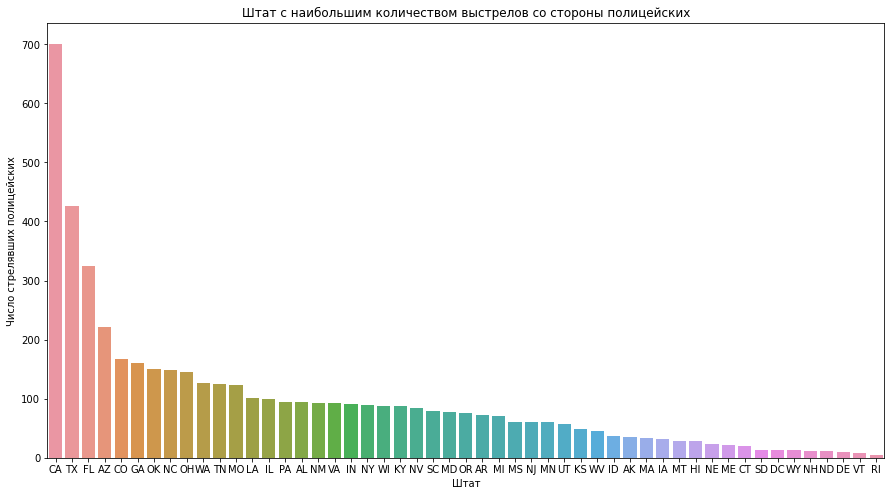

In [17]:
# сделаем визуализацию данных
plt.figure(figsize=(15,8))
sns.countplot(x='Штат', 
              data=shootings,
              order = shootings['Штат'].value_counts().index)
plt.title('Штат с наибольшим количеством выстрелов со стороны полицейских')
plt.xlabel('Штат')
plt.ylabel('Число стрелявших полицейских')
plt.show()

# Корреляция

In [18]:
# далее рассмотрим, есть ли корреляция между возрастом и ментальным здоровьем полицейских
shootings ['Возраст'].corr(shootings['Ментальное здоровье'])

0.0968647916348386

In [19]:
#тепловая карта для понимания корреляции между показателями
corr = shootings.corr()
X = [i for i in shootings.columns]

Text(0.5, 1.0, 'Тепловая матрица корреляций')

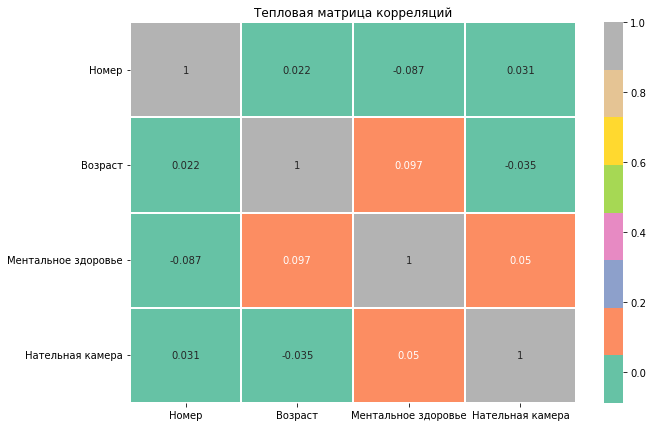

In [20]:
# Проверим есть ли мультиколиниарность в данных (т.е. переменные между собой не корелировали)
corrmat = shootings.corr()
plt.figure(figsize = (10, 7))
p =sns.heatmap(corrmat, annot=True, linecolor='white', linewidth=2, cmap="Set2")
plt.title('Тепловая матрица корреляций')

# Преобразование данных

In [21]:
#преобразуем возраст полицейских в старые и молодые и проведем бинарную классификацию
my_bins = (27, 40, 91)
groups = ['Старый', 'Молодой']
shootings['Возраст'] = pd.cut(shootings['Возраст'], bins = my_bins, labels = groups)

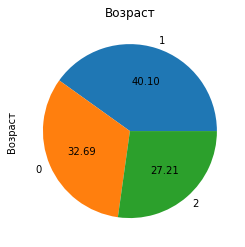

In [22]:
#произведем визуализацию данных
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()
shootings['Возраст']= label_quality.fit_transform(shootings['Возраст'])
shootings['Возраст'].value_counts().plot(kind = 'pie',autopct ='%.2f', title = "Возраст")
plt.show()

# Продвинутая визуализация

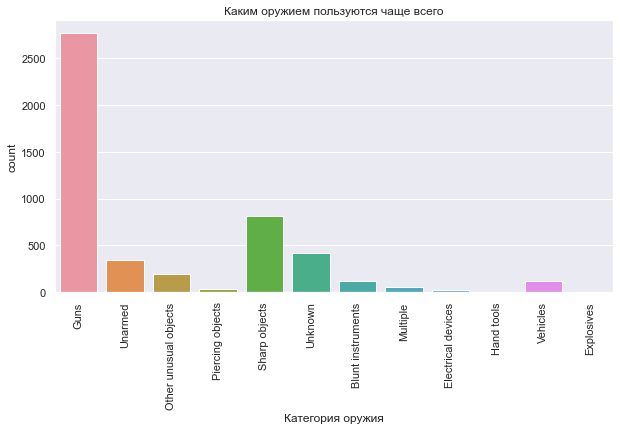

In [23]:
# каким оружием пользуются чаще всего
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
plt.xticks(rotation=90)
plt.title("Каким оружием пользуются чаще всего")
ax = sns.countplot(x="Категория оружия", data=shootings)

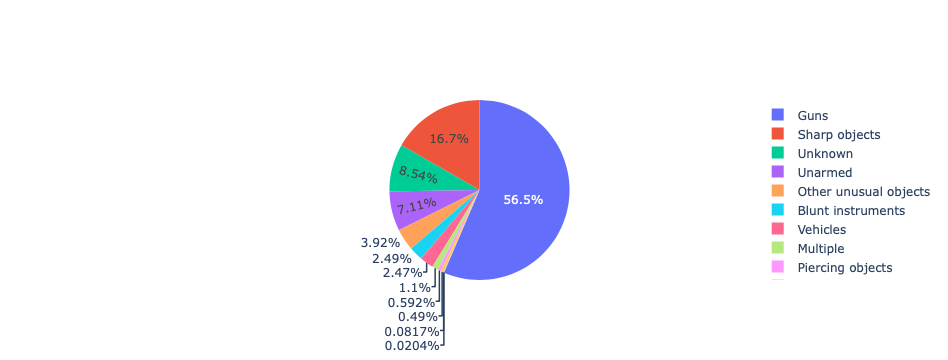

In [24]:
apps_in_category = shootings['Категория оружия'].value_counts().sort_values(ascending=True)

data = [go.Pie(labels = apps_in_category.index, values = apps_in_category.values, hoverinfo = 'label+value')]

#Plotly — библиотека для визуализации данных (позволяет строить интерактивные визуализации)
# Похожие на plotly - это bokeh и pygal 
plotly.offline.iplot(data, filename='active_category')

# Линейная регрессия

С данным датасетом не получится реализовать модель, поэтому будет рассмотрена другая база данных

In [25]:
import numpy as np
import pandas as pd
оружие= pd.read_excel('оружие.xlsx')

In [26]:
оружие.head(10)

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080,4,2,612.0
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.010,4,2,490.0
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.086,4,2,547.0
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.010,4,2,490.0
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.086,4,2,502.0
5,SCAR-L,Assault Rifle,5.56,43,30,600.0,880.0,0.096,4,2,448.0
6,M416,Assault Rifle,5.56,43,30,600.0,890.0,0.086,4,2,502.0
7,M16A4,Assault Rifle,5.56,43,30,600.0,900.0,0.010,4,2,430.0
8,G36C,Assault Rifle,5.56,43,30,600.0,880.0,0.086,4,2,502.0
9,OBZ,Assault Rifle,5.56,43,30,600.0,880.0,0.096,4,2,466.0


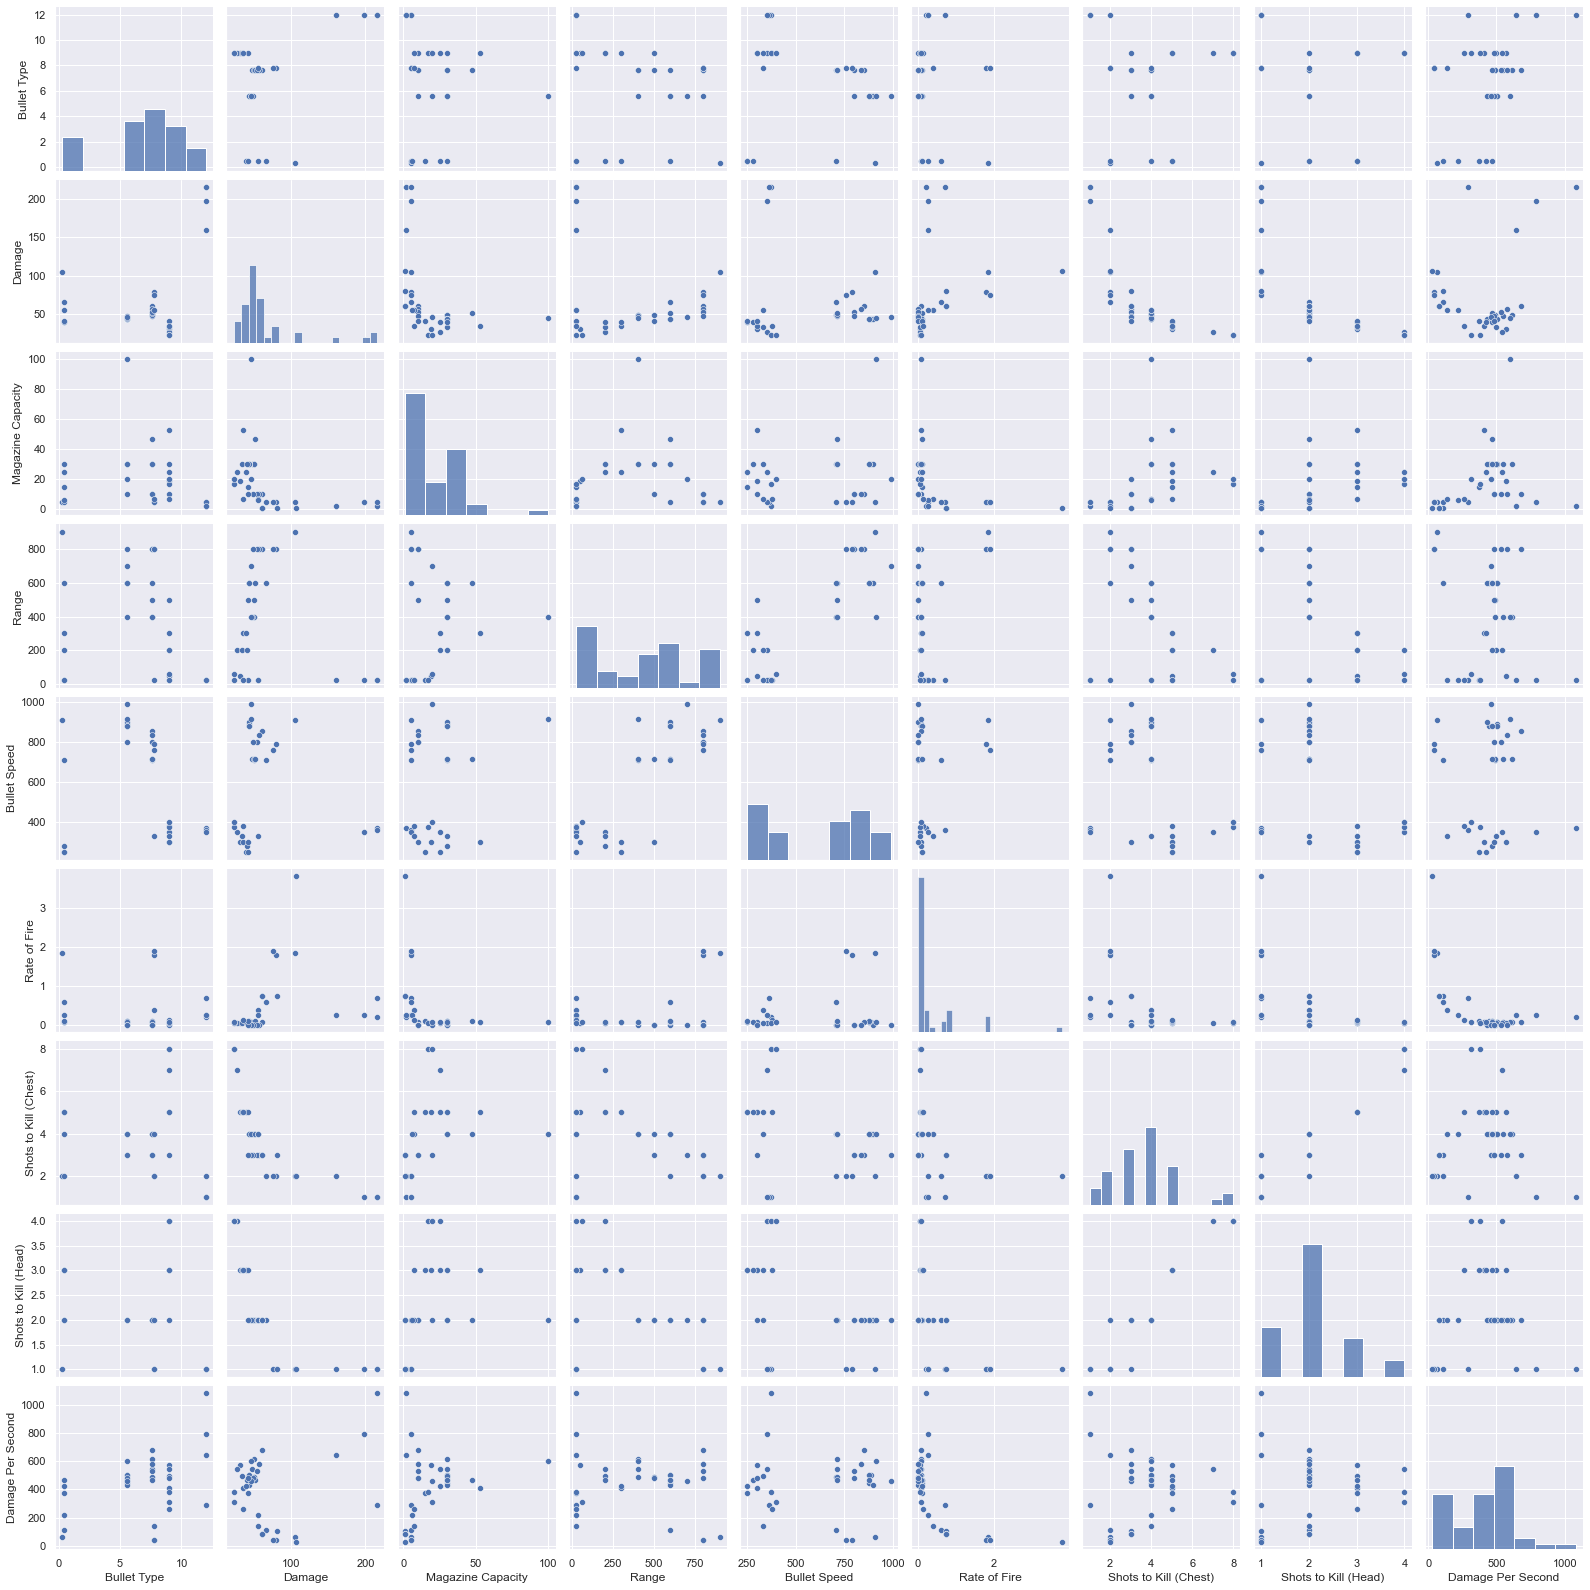

In [27]:
sns.pairplot(оружие)
#рассматриваем, есть ли между выбранными переменными корреляция

In [28]:
X = оружие['Damage']
y = оружие['Bullet Speed']

res = scipy.stats.linregress(X, y)
print(res)
#строим модель зависимости от урона и скорости пули

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)


In [29]:
# невозможно применить модель
r_sq = res.rvalue ** 2
print(r_sq)

nan


# Обучение модели

In [31]:
numeric = ['Bullet Type', 'Damage', 'Magazine Capacity', 'Range', 'Bullet Speed', 'Rate of Fire', 'Damage Per Second']

In [32]:
оружие.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weapon Name            43 non-null     object 
 1   Weapon Type            43 non-null     object 
 2   Bullet Type            38 non-null     float64
 3   Damage                 43 non-null     int64  
 4   Magazine Capacity      43 non-null     int64  
 5   Range                  38 non-null     float64
 6   Bullet Speed           36 non-null     float64
 7   Rate of Fire           43 non-null     float64
 8   Shots to Kill (Chest)  43 non-null     int64  
 9   Shots to Kill (Head)   43 non-null     int64  
 10  Damage Per Second      43 non-null     float64
dtypes: float64(5), int64(4), object(2)
memory usage: 3.8+ KB


In [33]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [36]:
compaign_df = оружие[['Bullet Type', 'Damage', 'Magazine Capacity', 'Range', 'Bullet Speed', 'Rate of Fire', 'Damage Per Second']]
target = оружие['Damage Per Second']
features = оружие.drop(['Damage Per Second'], axis=1)

In [37]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=42)